In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,precision_recall_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
seeds = [0,42,100,1000,10000,100000,1000000,10000000,100000000,1000000000]

##### 1. ROC curves

In [ ]:
# RanNeg
ft_posiRanNeg_key = pickle.load(open('PCorr_DGI_datasets/ft_posiRanNeg_key.pkl', 'rb'))
ft_negaRanNeg_seed_key = pickle.load(open('PCorr_DGI_datasets/ft_negaRanNeg_seed_key.pkl', 'rb'))

r_RanNeg = {}
for ge_key in ['CRISPR', 'RNAi']:
    ft_posi = ft_posiRanNeg_key[ge_key]
    ft_posi['label'] = [1] * len(ft_posi)
    X, y, X_train, X_val, X_test, y_train, y_val, y_test = {}, {}, {}, {}, {}, {}, {}, {}
    for s in tqdm(seeds):
        ft_nega = ft_negaRanNeg_seed_key[ge_key][s]
        ft_nega['label'] = [0] * len(ft_nega)
        ft_seed = pd.concat([ft_posi, ft_nega],axis=0)

        X[s] = np.array(ft_seed.iloc[:,:-2],dtype='float32')
        y[s] = np.array(ft_seed.iloc[:, [-1]],dtype='float32')
        X_train[s],X_temp,y_train[s],y_temp = train_test_split(X[s],y[s], test_size=0.2, random_state=42)
        X_val[s],X_test[s],y_val[s],y_test[s] = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

    if ge_key == 'CRISPR':
        rf = RandomForestClassifier(random_state=42,
                                    n_estimators=400, max_features=0.3, max_depth=15,
                                    min_samples_split=5, min_samples_leaf=3)
    else:
        rf = RandomForestClassifier(random_state=42,
                                    n_estimators=400, max_features=0.3, max_depth=15,
                                    min_samples_split=6, min_samples_leaf=3)

    r_RanNeg[ge_key] = {}

    r_RanNeg[ge_key]['fpr'] = {}
    r_RanNeg[ge_key]['tpr'] = {}
    r_RanNeg[ge_key]['roc_thre'] = {}
    r_RanNeg[ge_key]['auc'] = {}

    r_RanNeg[ge_key]['precision'] = {}
    r_RanNeg[ge_key]['recall'] = {}
    r_RanNeg[ge_key]['pr_thre'] = {}

    for s in tqdm(seeds):
        rf.fit(X_train[s], y_train[s])

        y_pred = rf.predict(X_test[s])
        y_probs = rf.predict_proba(X_test[s])[:, 1]

        fpr, tpr, threshold = roc_curve(y_test[s], y_probs,
                                        pos_label=1)  # Calculate false positive rate, true positive rate, threshold
        auc_ = auc(fpr, tpr)

        r_RanNeg[ge_key]['fpr'][s] = fpr
        r_RanNeg[ge_key]['tpr'][s] = tpr
        r_RanNeg[ge_key]['roc_thre'][s] = threshold
        r_RanNeg[ge_key]['auc'][s] = auc_

        precision, recall, thresholds = precision_recall_curve(y_test[s], y_probs)
        r_RanNeg[ge_key]['precision'][s] = precision
        r_RanNeg[ge_key]['recall'][s] = recall
        r_RanNeg[ge_key]['pr_thre'][s] = thresholds

In [ ]:
# DecoyNeg
ft_posiDecoyNeg_key = pickle.load(open('PCorr_DGI_datasets/ft_posiDecoyNeg_key.pkl', 'rb'))
ft_negaDecoyNeg_seed_key = pickle.load(open('PCorr_DGI_datasets/ft_negaDecoyNeg_seed_key.pkl', 'rb'))

r_DecoyNeg = {}
for ge_key in ['CRISPR', 'RNAi']:
    ft_posi = ft_posiRanNeg_key[ge_key]
    ft_posi['label'] = [1] * len(ft_posi)
    X, y, X_train, X_val, X_test, y_train, y_val, y_test = {}, {}, {}, {}, {}, {}, {}, {}
    for s in tqdm(seeds):
        ft_nega = ft_negaRanNeg_seed_key[ge_key][s]
        ft_nega['label'] = [0] * len(ft_nega)
        ft_seed = pd.concat([ft_posi, ft_nega],axis=0)

        X[s] = np.array(ft_seed.iloc[:,:-2],dtype='float32')
        y[s] = np.array(ft_seed.iloc[:, [-1]],dtype='float32')
        X_train[s],X_temp,y_train[s],y_temp = train_test_split(X[s],y[s], test_size=0.2, random_state=42)
        X_val[s],X_test[s],y_val[s],y_test[s] = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

    if ge_key == 'CRISPR':
        rf = RandomForestClassifier(random_state=42,
                                    n_estimators=400, max_features=0.3, max_depth=15,
                                    min_samples_split=5, min_samples_leaf=3)
    else:
        rf = RandomForestClassifier(random_state=42,
                                    n_estimators=400, max_features=0.3, max_depth=15,
                                    min_samples_split=6, min_samples_leaf=3)

    r_DecoyNeg[ge_key] = {}

    r_DecoyNeg[ge_key]['fpr'] = {}
    r_DecoyNeg[ge_key]['tpr'] = {}
    r_DecoyNeg[ge_key]['roc_thre'] = {}
    r_DecoyNeg[ge_key]['auc'] = {}

    r_DecoyNeg[ge_key]['precision'] = {}
    r_DecoyNeg[ge_key]['recall'] = {}
    r_DecoyNeg[ge_key]['pr_thre'] = {}

    for s in tqdm(seeds):
        rf.fit(X_train[s], y_train[s])

        y_pred = rf.predict(X_test[s])
        y_probs = rf.predict_proba(X_test[s])[:, 1]

        fpr, tpr, threshold = roc_curve(y_test[s], y_probs,
                                        pos_label=1)  # Calculate false positive rate, true positive rate, threshold
        auc_ = auc(fpr, tpr)

        r_DecoyNeg[ge_key]['fpr'][s] = fpr
        r_DecoyNeg[ge_key]['tpr'][s] = tpr
        r_DecoyNeg[ge_key]['roc_thre'][s] = threshold
        r_DecoyNeg[ge_key]['auc'][s] = auc_

        precision, recall, thresholds = precision_recall_curve(y_test[s], y_probs)
        r_DecoyNeg[ge_key]['precision'][s] = precision
        r_DecoyNeg[ge_key]['recall'][s] = recall
        r_DecoyNeg[ge_key]['pr_thre'][s] = thresholds

100%|██████████| 10/10 [00:00<00:00, 1253.23it/s]


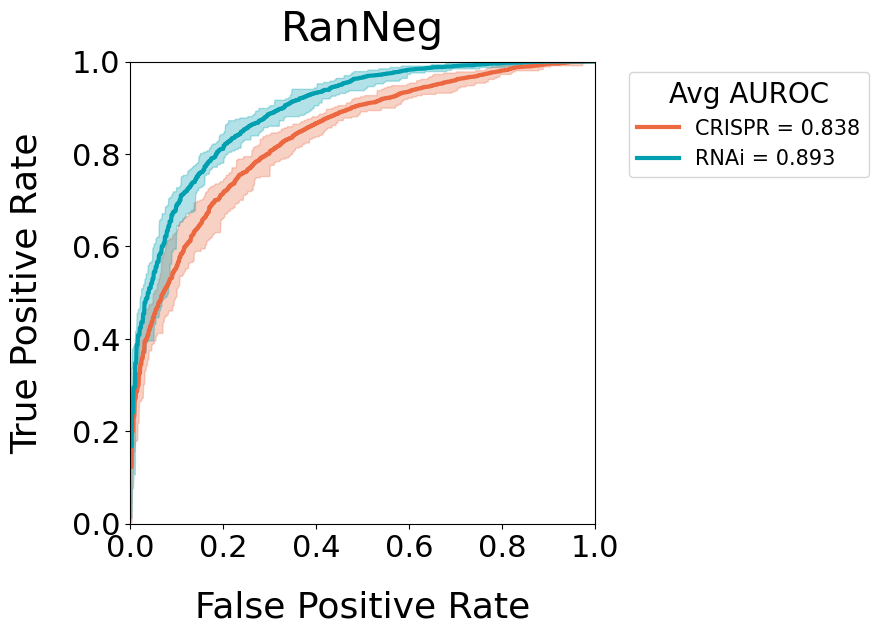

In [6]:
# RanNeg
r_roc = pickle.load(open('PCorr_DGI_datasets/r_RanNeg.pkl', 'rb'))

plt.figure(figsize=(6, 6))

r = r_roc['CRISPR']

auc_lst = []
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold, auc_ = r['fpr'][s], r['tpr'][s], r['roc_thre'][s], r['auc'][s]

    num_points = 1000
    fpr_fixed = np.linspace(0, 1, num_points)
    tpr_fixed = np.interp(fpr_fixed, fpr, tpr)

    df_fpr[s] = fpr_fixed
    df_tpr[s] = tpr_fixed

    auc_lst.append(auc_)

df_fpr['avg'] = np.mean(df_fpr, axis=1)

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

plt.plot(df_fpr['avg'], df_tpr['avg'], label='CRISPR = {}'.format(round(np.mean(auc_lst), 3)), color='#eb6841', lw=3, alpha=1)
plt.fill_between(df_fpr['avg'], df_tpr['min'], df_tpr['max'], color='#eb6841', alpha=0.3, antialiased=False)

r = r_roc['RNAi']

auc_lst = []
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold, auc_ = r['fpr'][s], r['tpr'][s], r['roc_thre'][s], r['auc'][s]
    num_points = 1000
    fpr_fixed = np.linspace(0, 1, num_points)
    tpr_fixed = np.interp(fpr_fixed, fpr, tpr)

    df_fpr[s] = fpr_fixed
    df_tpr[s] = tpr_fixed

    auc_lst.append(auc_)

df_fpr['avg'] = np.mean(df_fpr, axis=1)

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

plt.plot(df_fpr['avg'], df_tpr['avg'], label='RNAi = {}'.format(round(np.mean(auc_lst), 3)), color='#00a0b0', lw=3, alpha=1)
plt.fill_between(df_fpr['avg'], df_tpr['min'], df_tpr['max'], color='#00a0b0', alpha=0.3, antialiased=False)

plt.xlabel('False Positive Rate', fontsize=26, labelpad=20)
plt.ylabel('True Positive Rate', fontsize=26, labelpad=20)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('RanNeg',fontsize=30,pad=15)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), fontsize=15, markerfirst=True, markerscale=1, scatterpoints=1,
           ncol=1, title_fontsize=20,title='Avg AUROC')
plt.show()

100%|██████████| 10/10 [00:00<00:00, 1670.90it/s]


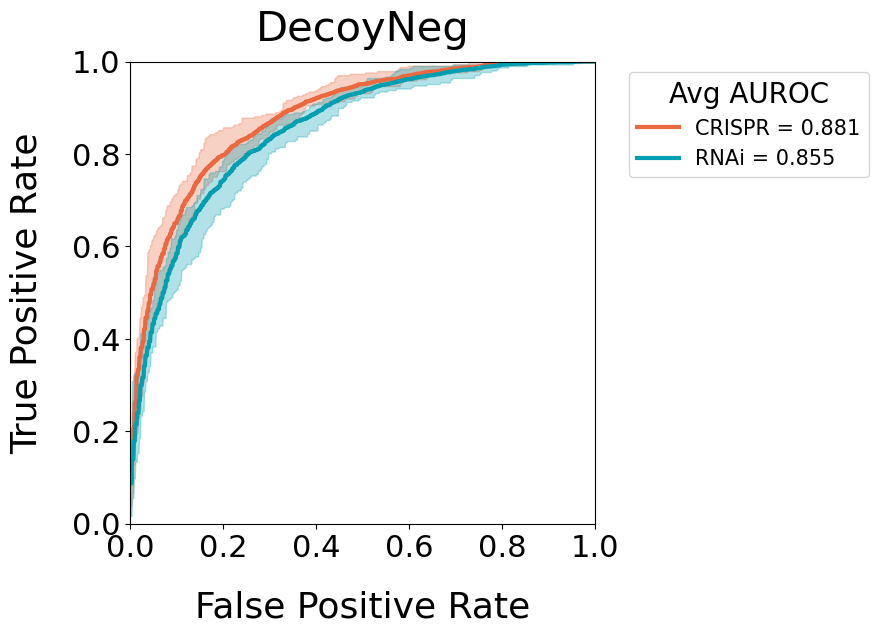

In [7]:
# DecoyNeg
r_roc = pickle.load(open('PCorr_DGI_datasets/r_DecoyNeg.pkl', 'rb'))

plt.figure(figsize=(6, 6))

r = r_roc['CRISPR']

auc_lst = []
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold, auc_ = r['fpr'][s], r['tpr'][s], r['roc_thre'][s], r['auc'][s]

    num_points = 1000
    fpr_fixed = np.linspace(0, 1, num_points)
    tpr_fixed = np.interp(fpr_fixed, fpr, tpr)

    df_fpr[s] = fpr_fixed
    df_tpr[s] = tpr_fixed

    auc_lst.append(auc_)

df_fpr['avg'] = np.mean(df_fpr, axis=1)

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

plt.plot(df_fpr['avg'], df_tpr['avg'], label='CRISPR = {}'.format(round(np.mean(auc_lst), 3)), color='#eb6841', lw=3, alpha=1)
plt.fill_between(df_fpr['avg'], df_tpr['min'], df_tpr['max'], color='#eb6841', alpha=0.3, antialiased=False)

r = r_roc['RNAi']

auc_lst = []
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold, auc_ = r['fpr'][s], r['tpr'][s], r['roc_thre'][s], r['auc'][s]
    num_points = 1000
    fpr_fixed = np.linspace(0, 1, num_points)
    tpr_fixed = np.interp(fpr_fixed, fpr, tpr)

    df_fpr[s] = fpr_fixed
    df_tpr[s] = tpr_fixed

    auc_lst.append(auc_)

df_fpr['avg'] = np.mean(df_fpr, axis=1)

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

plt.plot(df_fpr['avg'], df_tpr['avg'], label='RNAi = {}'.format(round(np.mean(auc_lst), 3)), color='#00a0b0', lw=3, alpha=1)
plt.fill_between(df_fpr['avg'], df_tpr['min'], df_tpr['max'], color='#00a0b0', alpha=0.3, antialiased=False)

plt.xlabel('False Positive Rate', fontsize=26, labelpad=20)
plt.ylabel('True Positive Rate', fontsize=26, labelpad=20)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('DecoyNeg',fontsize=30,pad=15)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), fontsize=15, markerfirst=True, markerscale=1, scatterpoints=1,
           ncol=1, title_fontsize=20,title='Avg AUROC')
plt.show()

##### 2. TPR/FPR-Threshold curves

100%|██████████| 10/10 [00:00<00:00, 911.43it/s]


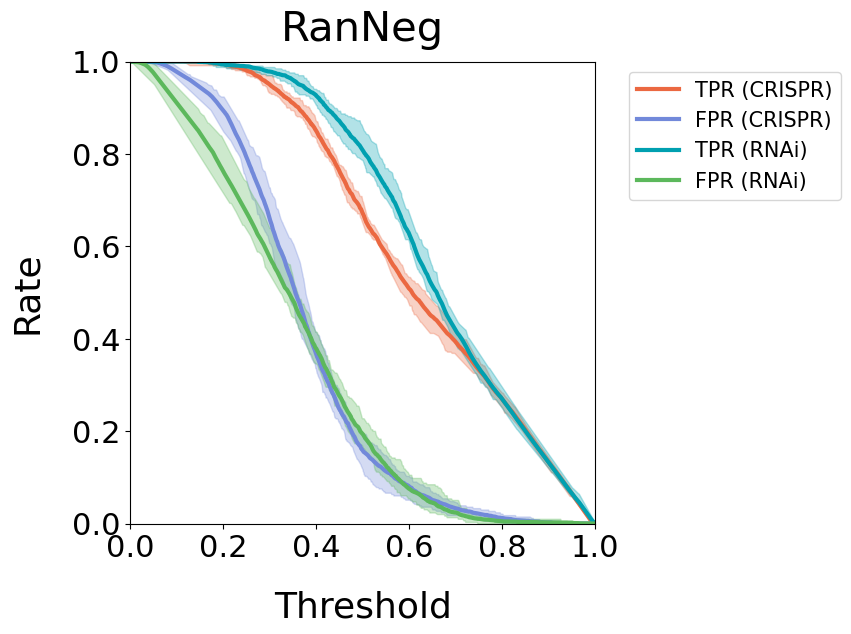

100%|██████████| 10/10 [00:00<00:00, 1432.53it/s]


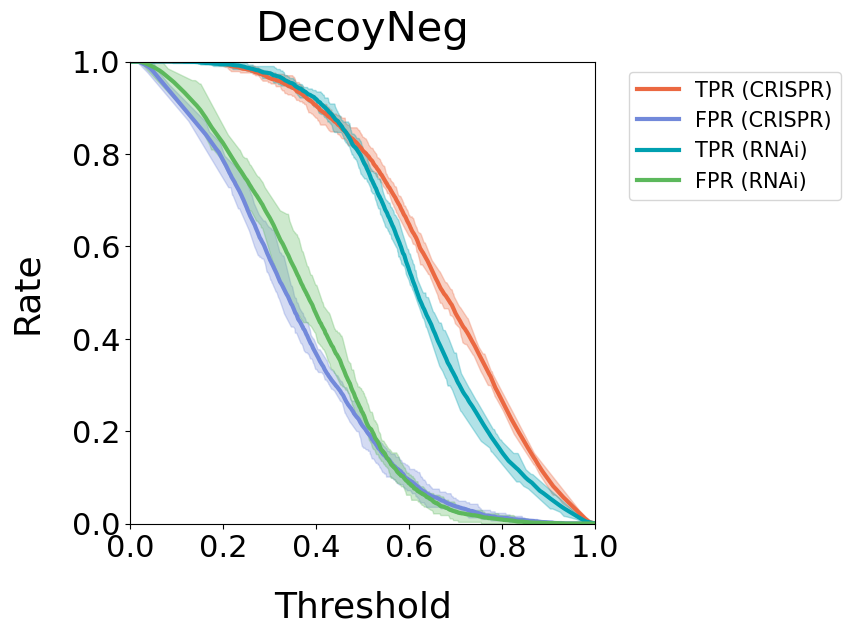

In [9]:
# RanNeg
r_roc = pickle.load(open('PCorr_DGI_datasets/r_RanNeg.pkl', 'rb'))

plt.figure(figsize=(6, 6))

r = r_roc['CRISPR']

num_points = 1000
threshold_fixed = np.linspace(0, 1, num_points)

df_threshold = pd.DataFrame()
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold = r['fpr'][s], r['tpr'][s], r['roc_thre'][s]
    threshold[0] = 1

    tpr_fixed = np.interp(threshold_fixed, threshold[::-1], tpr[::-1])
    fpr_fixed = np.interp(threshold_fixed, threshold[::-1], fpr[::-1])

    df_threshold[s] = threshold_fixed
    df_tpr[s] = tpr_fixed
    df_fpr[s] = fpr_fixed

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

df_fpr['avg'] = np.mean(df_fpr, axis=1)
df_fpr['min'] = np.min(df_fpr, axis=1)
df_fpr['max'] = np.max(df_fpr, axis=1)

plt.plot(threshold_fixed, df_tpr['avg'], label='TPR (CRISPR)', color='#eb6841', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_tpr['min'], df_tpr['max'], color='#eb6841', alpha=0.3, antialiased=False)

plt.plot(threshold_fixed, df_fpr['avg'], label='FPR (CRISPR)', color='#7289da', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_fpr['min'], df_fpr['max'], color='#7289da', alpha=0.3, antialiased=False)

r = r_roc['RNAi']

num_points = 1000
threshold_fixed = np.linspace(0, 1, num_points)

df_threshold = pd.DataFrame()
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold = r['fpr'][s], r['tpr'][s], r['roc_thre'][s]
    threshold[0] = 1

    tpr_fixed = np.interp(threshold_fixed, threshold[::-1], tpr[::-1])
    fpr_fixed = np.interp(threshold_fixed, threshold[::-1], fpr[::-1])

    df_threshold[s] = threshold_fixed
    df_tpr[s] = tpr_fixed
    df_fpr[s] = fpr_fixed

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

df_fpr['avg'] = np.mean(df_fpr, axis=1)
df_fpr['min'] = np.min(df_fpr, axis=1)
df_fpr['max'] = np.max(df_fpr, axis=1)

plt.plot(threshold_fixed, df_tpr['avg'], label='TPR (RNAi)', color='#00a0b0', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_tpr['min'], df_tpr['max'], color='#00a0b0', alpha=0.3, antialiased=False)

plt.plot(threshold_fixed, df_fpr['avg'], label='FPR (RNAi)', color='#5cb85c', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_fpr['min'], df_fpr['max'], color='#5cb85c', alpha=0.3, antialiased=False)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Threshold', fontsize=26, labelpad=20)
plt.ylabel('Rate', fontsize=26, labelpad=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('RanNeg',fontsize=30,pad=15)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), fontsize=15, markerfirst=True, markerscale=1, scatterpoints=1,
           ncol=1)
plt.show()

# DecoyNeg
r_roc = pickle.load(open('PCorr_DGI_datasets/r_DecoyNeg.pkl', 'rb'))

plt.figure(figsize=(6, 6))

r = r_roc['CRISPR']

num_points = 1000
threshold_fixed = np.linspace(0, 1, num_points)

df_threshold = pd.DataFrame()
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold = r['fpr'][s], r['tpr'][s], r['roc_thre'][s]
    threshold[0] = 1

    tpr_fixed = np.interp(threshold_fixed, threshold[::-1], tpr[::-1])
    fpr_fixed = np.interp(threshold_fixed, threshold[::-1], fpr[::-1])

    df_threshold[s] = threshold_fixed
    df_tpr[s] = tpr_fixed
    df_fpr[s] = fpr_fixed

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

df_fpr['avg'] = np.mean(df_fpr, axis=1)
df_fpr['min'] = np.min(df_fpr, axis=1)
df_fpr['max'] = np.max(df_fpr, axis=1)

plt.plot(threshold_fixed, df_tpr['avg'], label='TPR (CRISPR)', color='#eb6841', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_tpr['min'], df_tpr['max'], color='#eb6841', alpha=0.3, antialiased=False)

plt.plot(threshold_fixed, df_fpr['avg'], label='FPR (CRISPR)', color='#7289da', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_fpr['min'], df_fpr['max'], color='#7289da', alpha=0.3, antialiased=False)

r = r_roc['RNAi']

num_points = 1000
threshold_fixed = np.linspace(0, 1, num_points)

df_threshold = pd.DataFrame()
df_fpr = pd.DataFrame()
df_tpr = pd.DataFrame()
for s in tqdm(seeds):
    fpr, tpr, threshold = r['fpr'][s], r['tpr'][s], r['roc_thre'][s]
    threshold[0] = 1

    tpr_fixed = np.interp(threshold_fixed, threshold[::-1], tpr[::-1])
    fpr_fixed = np.interp(threshold_fixed, threshold[::-1], fpr[::-1])

    df_threshold[s] = threshold_fixed
    df_tpr[s] = tpr_fixed
    df_fpr[s] = fpr_fixed

df_tpr['avg'] = np.mean(df_tpr, axis=1)
df_tpr['min'] = np.min(df_tpr, axis=1)
df_tpr['max'] = np.max(df_tpr, axis=1)

df_fpr['avg'] = np.mean(df_fpr, axis=1)
df_fpr['min'] = np.min(df_fpr, axis=1)
df_fpr['max'] = np.max(df_fpr, axis=1)

plt.plot(threshold_fixed, df_tpr['avg'], label='TPR (RNAi)', color='#00a0b0', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_tpr['min'], df_tpr['max'], color='#00a0b0', alpha=0.3, antialiased=False)

plt.plot(threshold_fixed, df_fpr['avg'], label='FPR (RNAi)', color='#5cb85c', lw=3, alpha=1)
plt.fill_between(threshold_fixed, df_fpr['min'], df_fpr['max'], color='#5cb85c', alpha=0.3, antialiased=False)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Threshold', fontsize=26, labelpad=20)
plt.ylabel('Rate', fontsize=26, labelpad=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('DecoyNeg',fontsize=30,pad=15)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), fontsize=15, markerfirst=True, markerscale=1, scatterpoints=1,
           ncol=1)
plt.show()